[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module2_Files/0_BinaryClassification_Titanic_structured_data.ipynb)

# Classification with DNNs: Titanic
-------------------------------
**Dr. Dave Wanik**

Can you predict whether someone will survive the Titanic or not?

A description of the data can be found here: https://www.kaggle.com/c/titanic/data

In [ ]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

!pip install scikeras
from scikeras.wrappers import KerasClassifier # updated 2023
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

## EDA
Read in the data, check for missing values, some interesting plots.

In [ ]:
# # read data from github
# df = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

In [ ]:
# # read from shareable link
# # https://drive.google.com/file/d/1-sfX5y1olZm7_0iZcY1-mP2LyvTTcaNH/view?usp=sharing
# !gdown 1-sfX5y1olZm7_0iZcY1-mP2LyvTTcaNH
# df = pd.read_csv('titanic_train.csv')

Downloading...
From: https://drive.google.com/uc?id=1-sfX5y1olZm7_0iZcY1-mP2LyvTTcaNH
To: /content/titanic_train.csv
100% 60.3k/60.3k [00:00<00:00, 163MB/s]


In [ ]:
# Link to the data file on Github
url = "https://raw.githubusercontent.com/drdave-teaching/OPIM5509Files/refs/heads/main/OPIM5509_Module2_Files/titanic_train.csv"

# retrieve the data and build a dataframe
df = pd.read_csv(url)

df.shape

(891, 12)

In [ ]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# for simplicity, we will impute AGE with the mean, and delete the cabin column,
# then delete any rows with missing values (should only be from 'Embarked')

# first, delete the cabin column
df.drop(['Cabin'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# now inpute the 'Age' column
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# now ditch the two rows from 'Embarked'
df.dropna(inplace=True)

In [ ]:
# voila! 889 rows.
df.info()

# now let's clean up the test data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
# check out the test data for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
# check out the data
df.head()

# we see PassengerID, Name and Ticket probably aren't useful,
# and that the Sex and Embarked column needs to get recoded into a number

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# drop unncessary columns from train and testdf
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# recode the sex column
df['Sex'].replace(('male', 'female'), (0, 1), inplace=True)

# recode the embarked column
df['Embarked'].replace(('Q', 'S', 'C'), (0, 1, 2), inplace=True)

# check your work - great! ready for modeling.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB
None


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [ ]:
# check your work - great! ready for modeling.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB
None


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [ ]:
# check distribution of target variable
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
# if your model is smart, it should have an accuracy better
# than a dummy model (that just predicts the majority class)
(549/(549+340))

0.6175478065241845

## Split Data into X and Y

In [ ]:
# split into X and Y
Y = df['Survived']
X = df.drop(['Survived'], axis=1)

print(X.shape)
print(Y.shape)

(889, 7)
(889,)


In [ ]:
# convert to numpy arrays
X = np.array(X)

## Build a Model - no callbacks
Let's build a dense neural network!

In [ ]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # don't forget to add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fit the model
history = model.fit(X,
                    Y,
                    epochs=80,
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True)

Epoch 1/80
72/72 [==============================] - 2s 8ms/step - loss: 0.9572 - accuracy: 0.5176 - val_loss: 0.5950 - val_accuracy: 0.7135
Epoch 2/80
72/72 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.6343 - val_loss: 0.6024 - val_accuracy: 0.6573
Epoch 3/80
72/72 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6554 - val_loss: 0.5407 - val_accuracy: 0.7416
Epoch 4/80
72/72 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6990 - val_loss: 0.5344 - val_accuracy: 0.7135
Epoch 5/80
72/72 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6821 - val_loss: 0.5219 - val_accuracy: 0.7303
Epoch 6/80
72/72 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.6751 - val_loss: 0.5277 - val_accuracy: 0.7303
Epoch 7/80
72/72 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.6934 - val_loss: 0.5136 - val_accuracy: 0.7360
Epoch 8/80
72/72 [==

In [ ]:
# now you could plot the epochs and train for exactly that many...
# but callbacks and early stopping are way better!
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

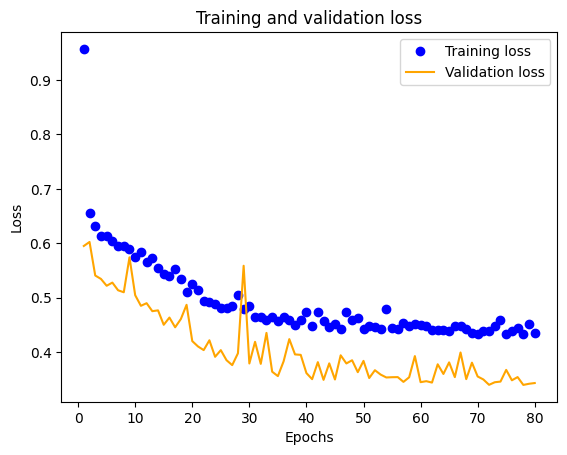

In [ ]:
# can paste in learning curve code from previous examples
# just need to update dictionary keys to accuracy etc.

# let's see the training and validation loss by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

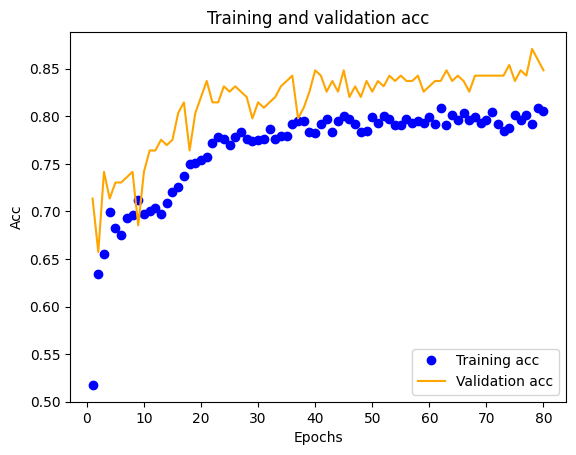

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['accuracy'] # you can change this
val_loss_values = history_dict['val_accuracy'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'orange', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Build a Model - with callbacks
Let's introduce early stopping, we could also introduce some weight regularization then revisualization our network.

Link: https://keras.io/api/callbacks/early_stopping/

In [ ]:
# we will keep the same model architecture as before,
# but we will make this a little simpler...

# early stopping callback
# This callback will stop the training when there is no improvement in
# the validation loss for 10 consecutive epochs.
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=20,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=1000, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7947 - val_loss: 0.3346 - val_accuracy: 0.8427
Epoch 2/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7975 - val_loss: 0.3440 - val_accuracy: 0.8371
Epoch 3/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8031 - val_loss: 0.3334 - val_accuracy: 0.8483
Epoch 4/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.7961 - val_loss: 0.3646 - val_accuracy: 0.8427
Epoch 5/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8115 - val_loss: 0.3491 - val_accuracy: 0.8427
Epoch 6/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7876 - val_loss: 0.3344 - val_accuracy: 0.8427
Epoch 7/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7918 - val_loss: 0.3321 - val_accuracy: 0.8427
Epoch 

## Evaluate the Model
Always check out the learning curve, show the TP, FP, TN, FN as well as the classification report.

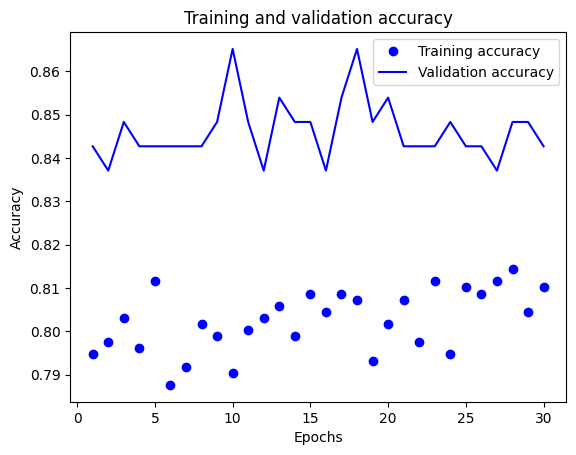

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# this is the max value - should correspond to
# the HIGHEST train accuracy (go look at the verbose from the model fit)
np.max(val_acc)

0.8651685118675232

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# see how these are numbers between 0 and 1? prob of successes (survival)
model.predict(X)

28/28 [==============================] - 0s 1ms/step


array([[1.11363038e-01],
       [8.99897993e-01],
       [4.59656477e-01],
       [9.10124958e-01],
       [6.03770912e-02],
       [8.46755132e-02],
       [1.63113937e-01],
       [1.76546633e-01],
       [3.64315480e-01],
       [8.14702809e-01],
       [8.41829181e-01],
       [7.82887340e-01],
       [1.40349731e-01],
       [2.49248762e-02],
       [6.39026165e-01],
       [5.72972894e-01],
       [1.55763188e-02],
       [1.12971865e-01],
       [4.08095896e-01],
       [3.38741839e-01],
       [1.14886358e-01],
       [9.31743160e-02],
       [6.89590335e-01],
       [4.00723457e-01],
       [2.12345511e-01],
       [1.11582480e-01],
       [7.34147727e-02],
       [4.42398012e-01],
       [5.00795841e-01],
       [7.71487206e-02],
       [1.23743087e-01],
       [8.98627043e-01],
       [4.97295767e-01],
       [4.25434560e-02],
       [3.45612168e-01],
       [2.41566971e-01],
       [7.34142810e-02],
       [1.30232587e-01],
       [4.56001252e-01],
       [5.38871229e-01],


In [ ]:
np.round(model.predict(X),0)

28/28 [==============================] - 0s 936us/step


array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
# here is Y
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [ ]:
# see how the model did!
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
confusion_matrix(Y, preds) # order matters! (actual, predicted)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

# look at documentation for conf matrix on sklearn if you have questions!

28/28 [==============================] - 0s 949us/step


array([[520,  29],
       [138, 202]])

In [ ]:
print(classification_report(Y, preds))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       549
           1       0.87      0.59      0.71       340

    accuracy                           0.81       889
   macro avg       0.83      0.77      0.78       889
weighted avg       0.82      0.81      0.80       889



# Go Play!
* Shuffle the original dataframe
* Split your data into train and test partitions
* Consider pre-processing your data (MinMaxScaling, PolynomialFeatures)
  * https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
* Add more layers and change the number of hidden units
* Try to use 'tanh' instead of 'relu' and see how your results change.
* Try to use adam instead of rmsprop if you want (this includes a momentum term!), and customize it with other learning rates.
  * https://keras.io/api/optimizers/adam/
* Consider setting restore_best_weights=False and see how the confusion matrix changes.
* Try this on another dataset.